# **How strong is a freelancer profile?**

## **Background**

- **Scalifier** - Help scale/level-up-  businesses 

- **Goal:** Use Data Science and Analytics to help boost freelancer profiles
  - Optimize the search rank of profiles 
  - Come up with a metric to evaluate a profile 
  - Find the most important features that influence search rank 
  - Predict search rank for new profile 

- Search Engine Optimization
- **Tools:** Python, Scikit-learn, AWS, ELK

## **Project Workflow**

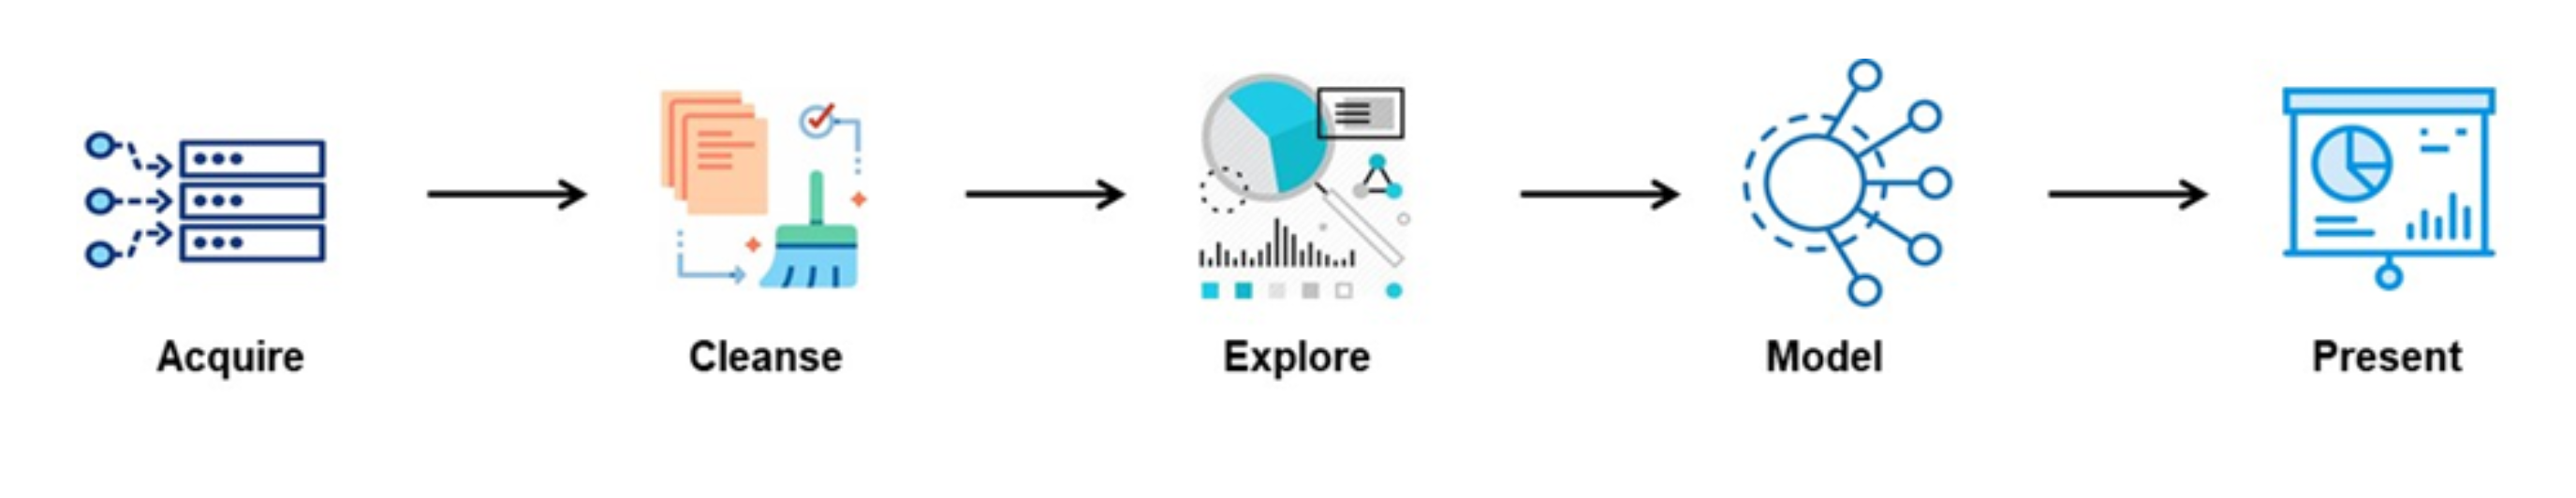

## **Problem Statement**

We have data showing user profiles on the Upwork website. This data is labeled for the searchRank for every user based on their skill (querySkill). We want to use this data to predict what the searchRank would be for an out-of-sample user once we have the data listed on their Upwork profile. 


## **Library Imports**

In [167]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')


In [168]:
plt.rcParams['figure.figsize'] = (12, 5)


In [169]:
df = pd.read_json('/content/drive/MyDrive/Scalifier/allProfilesUpdated.json')

In [170]:
df.head()

,recno,ciphertext,shortName,title,description,portrait,location,hourlyRate,lastActivity,totalHoursBilled,...,url,topRatedStatusEx,uid,searchRank,querySkill,querySkillUid,date_scrapped,totalRevenue,combinedRecentEarnings,combinedAverageRecentEarnings
0,13422873,~01525501ed621c1619,Balbinder S.,Full Stack Developer,"Hi, I am Balbinder,\nI have been doing app dev...",https://www.upwork.com/profile-portraits/c1GnS...,"{'country': 'United States', 'city': 'Palm Coa...","{'currencyCode': 'USD', 'amount': 110}",2021-06-13T00:00:00.000Z,9495.500000,...,/o/profiles/users/~01525501ed621c1619/,NaN,794593882819100672,458,API Development,1031626745118703616,2021-06-17T06:17:21.861Z,NaN,NaN,NaN
1,27520224,~0194a7954c0c0b0b93,Kishori L.,Web developer : ASP.NET,Have 5+ years of web development using NET Fra...,https://www.upwork.com/profile-portraits/c1imZ...,"{'country': 'India', 'city': 'Mohali', 'state'...","{'currencyCode': 'USD', 'amount': 14}",2020-09-10T00:00:00.000Z,1396.166667,...,/o/profiles/users/~0194a7954c0c0b0b93/,NaN,1172174492672786432,108,OOPS,1031626745118703616,2021-06-16T14:31:52.590Z,NaN,NaN,NaN
2,10621482,~01706ebd6c67d45486,Vladislav G.,Ecommerce Development / iOS / Cross-platform d...,Over the recent 5 years I've developed native ...,https://www.upwork.com/profile-portraits/c1NX3...,"{'country': 'Ukraine', 'city': 'Kharkiv', 'sta...","{'currencyCode': 'USD', 'amount': 39}",2020-02-06T00:00:00.000Z,1200.761034,...,/o/profiles/users/~01706ebd6c67d45486/,NaN,698432513041072128,452,API Development,1031626741293498368,2021-06-17T06:17:21.861Z,NaN,NaN,NaN
3,20961751,~01f462eda81681ab22,Matthew H.,SEO Web Content Specialist,The big push in SEO best practices is to estab...,https://www.upwork.com/profile-portraits/c1yip...,"{'country': 'United States', 'city': 'Joplin',...","{'currencyCode': 'USD', 'amount': 40}",2021-06-14T00:00:00.000Z,35.333333,...,/o/profiles/users/~01f462eda81681ab22/,NaN,1005636751019507712,374,Real Time Stream Processing,1031626749656940544,2021-06-17T05:59:52.676Z,NaN,NaN,NaN
4,31620881,~01658c07fb14af66fc,Hussain M.,".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...","Hello My name is Hussain Murtaza, I am a Senio...",https://www.upwork.com/profile-portraits/c1LXU...,"{'country': 'Pakistan', 'city': 'Multan', 'sta...","{'currencyCode': 'USD', 'amount': 20}",2021-06-14T00:00:00.000Z,118.500000,...,/o/profiles/users/~01658c07fb14af66fc/,NaN,1257409866615193600,32,API Development,1031626741293498368,2021-06-17T06:17:21.861Z,NaN,NaN,NaN


## **Data Cleaning**

In [171]:
df['combinedTotalEarnings']

0         275612.50
1       56062604.80
2       27630978.69
3           7308.17
4           9541.00
           ...     
4775        2948.83
4776       17652.84
4777          50.00
4778       15965.02
4779       70324.69
Name: combinedTotalEarnings, Length: 4780, dtype: float64

In [172]:
len(df)

4780

In [173]:
## Check for missing data 
df.isnull().sum()

recno                               0
ciphertext                          0
shortName                           0
title                               0
description                         0
portrait                            2
location                            0
hourlyRate                          0
lastActivity                        0
totalHoursBilled                    0
totalPortfolioItems                 0
totalPassedTests                    0
skills                              0
groups                           4582
agencies                         2606
nss100                              0
highlighting                        0
rankInfo                            0
topRatedStatus                      0
certificates                     4780
portfolioItems                   4780
extendedAgencies                 3413
combinedTotalRevenue              298
totalHourlyJobs                     0
totalFpJobs                         0
hideEarnings                        0
hideJss     

There seems to be quite a few columns with missing values. After manually looking at these columns, we can choose to drop them as they do not provide any information that can help us model the rank.

In [174]:
df.shape

(4780, 46)

In [175]:
df.drop(['groups', 'agencies', 'certificates', 'portfolioItems', 'extendedAgencies', 'bestMatchOccupationUid', 'occupationProfiles', 'topRatedStatusEx', 'totalRevenue', 'combinedRecentEarnings', 'combinedAverageRecentEarnings'], axis=1, inplace=True)

In [176]:
df.shape

(4780, 35)

In [177]:
columns = df.columns.to_list()
print(columns)

['recno', 'ciphertext', 'shortName', 'title', 'description', 'portrait', 'location', 'hourlyRate', 'lastActivity', 'totalHoursBilled', 'totalPortfolioItems', 'totalPassedTests', 'skills', 'nss100', 'highlighting', 'rankInfo', 'topRatedStatus', 'combinedTotalRevenue', 'totalHourlyJobs', 'totalFpJobs', 'hideEarnings', 'hideJss', 'combinedTotalEarnings', 'personUid', 'topTalentGroup', 'isServiceProfile', 'descriptionSanitized', 'shortNameSanitized', 'titleSanitized', 'url', 'uid', 'searchRank', 'querySkill', 'querySkillUid', 'date_scrapped']


Having removed the columns with missing values, we find that there are still some attributes that do not contribute to the rank and hence we can drop them:

ciphertext (Encrypted)
Highlighting
rankInfo (Encrypted)
hideJss (all 0)
isServiceProfile (all FALSE)
totalPassedTests (all 0)
We can go ahead and drop these variables.

In [178]:
df.drop(['ciphertext', 'highlighting', 'rankInfo', 'hideJss', 'isServiceProfile', 'totalPassedTests'], axis=1, inplace=True)

In [179]:
df.shape

(4780, 29)

There is still some cleaning to do before we have our final dataset that we can use to start modeling. The columns description, shortName and title have a sanitzed version. Comparing these columns manually, we find that the content of the two columns are more or less the same and hence it would not make much sense to have both of them in our dataset. Let us go ahead and drop the unsanitized versions of these columns.

In [180]:
df.drop(['title', 'description', 'shortName'], axis=1, inplace=True)

In [181]:
df.shape

(4780, 26)

In [182]:
df.columns

Index(['recno', 'portrait', 'location', 'hourlyRate', 'lastActivity',
       'totalHoursBilled', 'totalPortfolioItems', 'skills', 'nss100',
       'topRatedStatus', 'combinedTotalRevenue', 'totalHourlyJobs',
       'totalFpJobs', 'hideEarnings', 'combinedTotalEarnings', 'personUid',
       'topTalentGroup', 'descriptionSanitized', 'shortNameSanitized',
       'titleSanitized', 'url', 'uid', 'searchRank', 'querySkill',
       'querySkillUid', 'date_scrapped'],
      dtype='object')

Now we can go over individual columns that require cleaning.

## hourlyRate

The hourlyRate column contains values in a dictionary where the first key is the currencyCode and the second key is the respective amount. Let us check the unique currencies accepted. 

In [183]:
currency_codes = [item.get('currencyCode') for item in df['hourlyRate']]
unique_currency_codes = list(set(currency_codes))
print(unique_currency_codes)

['USD']


We notice that all the amounts listed in the hourlyRate column are in USD. Therefore, we can extract the amount from the dictionaries listed in this column and hence make it completely quantitative. 

In [184]:
hourly_rates = [item.get('amount') for item in df['hourlyRate']]
df['hourlyRate'] = hourly_rates

## Skills 

In [185]:
df['skills'][0]

[{'skill': {'name': 'php', 'prettyName': 'PHP'},
  'skillUrl': '/search/profiles/?q=skills%3Aphp',
  'uid': '996364628025274385'},
 {'skill': {'name': 'api-development', 'prettyName': 'API Development'},
  'skillUrl': '/search/profiles/?q=skills%3Aapi-development',
  'uid': '1031626714051493888'},
 {'skill': {'name': 'laravel-framework', 'prettyName': 'Laravel'},
  'skillUrl': '/search/profiles/?q=skills%3Alaravel-framework',
  'uid': '1031626753368899584'},
 {'skill': {'name': 'ajax', 'prettyName': 'AJAX'},
  'skillUrl': '/search/profiles/?q=skills%3Aajax',
  'uid': '1031626711270670336'},
 {'skill': {'name': 'jquery', 'prettyName': 'jQuery'},
  'skillUrl': '/search/profiles/?q=skills%3Ajquery',
  'uid': '1031626751737315328'},
 {'skill': {'name': 'magento-2', 'prettyName': 'Magento 2'},
  'skillUrl': '/search/profiles/?q=skills%3Amagento-2',
  'uid': '1031626755600269312'},
 {'skill': {'name': 'ionic-framework', 'prettyName': 'Ionic Framework'},
  'skillUrl': '/search/profiles/?q=ski

What we need is a list of all the prettyNames of skills within each entry. Let us try and extract that.

In [186]:
main_skill_list = []
for item in df['skills']:
  skill_list = []
  for i in range(len(item)):
    skill_list.append(item[i]['skill']['prettyName'])
  main_skill_list.append(skill_list)

In [187]:
df['skills'] = main_skill_list

## personUid and uid



The personUid and uid columns seem to be identical. Let us check this. 

In [188]:
df['personUid'].equals(df['uid'])

True

In [189]:
df.drop(['personUid'], axis=1, inplace=True)

In [190]:
df.head()

,recno,portrait,location,hourlyRate,lastActivity,totalHoursBilled,totalPortfolioItems,skills,nss100,topRatedStatus,...,topTalentGroup,descriptionSanitized,shortNameSanitized,titleSanitized,url,uid,searchRank,querySkill,querySkillUid,date_scrapped
0,13422873,https://www.upwork.com/profile-portraits/c1GnS...,"{'country': 'United States', 'city': 'Palm Coa...",110.0,2021-06-13T00:00:00.000Z,9495.500000,35,"[PHP, API Development, Laravel, AJAX, jQuery, ...",1.00000,top_rated,...,top_rated_plus,"Hi, I am Balbinder,\nI have been doing app dev...",Balbinder S.,Full Stack Developer,/o/profiles/users/~01525501ed621c1619/,794593882819100672,458,API Development,1031626745118703616,2021-06-17T06:17:21.861Z
1,27520224,https://www.upwork.com/profile-portraits/c1imZ...,"{'country': 'India', 'city': 'Mohali', 'state'...",14.0,2020-09-10T00:00:00.000Z,1396.166667,5,"[ASP.NET MVC, Angular, jQuery, AJAX, ASP.NET, ...",0.98890,top_rated,...,top_rated_plus,Have 5+ years of web development using NET Fra...,Kishori L.,Web developer : ASP.NET,/o/profiles/users/~0194a7954c0c0b0b93/,1172174492672786432,108,OOPS,1031626745118703616,2021-06-16T14:31:52.590Z
2,10621482,https://www.upwork.com/profile-portraits/c1NX3...,"{'country': 'Ukraine', 'city': 'Kharkiv', 'sta...",39.0,2020-02-06T00:00:00.000Z,1200.761034,2,"[iOS Development, Objective-C, Apple Xcode, SQ...",0.97700,top_rated,...,top_rated_plus,Over the recent 5 years I&#039;ve developed na...,Vladislav G.,Ecommerce Development / iOS / Cross-platform d...,/o/profiles/users/~01706ebd6c67d45486/,698432513041072128,452,API Development,1031626741293498368,2021-06-17T06:17:21.861Z
3,20961751,https://www.upwork.com/profile-portraits/c1yip...,"{'country': 'United States', 'city': 'Joplin',...",40.0,2021-06-14T00:00:00.000Z,35.333333,3,"[SEO Writing, Blog Writing, Article Writing, C...",0.91665,top_rated,...,not_eligible,The big push in SEO best practices is to estab...,Matthew H.,SEO Web Content Specialist,/o/profiles/users/~01f462eda81681ab22/,1005636751019507712,374,Real Time Stream Processing,1031626749656940544,2021-06-17T05:59:52.676Z
4,31620881,https://www.upwork.com/profile-portraits/c1LXU...,"{'country': 'Pakistan', 'city': 'Multan', 'sta...",20.0,2021-06-14T00:00:00.000Z,118.500000,7,"[API, Database Architecture, Website Developme...",1.00000,top_rated,...,not_eligible,"Hello My name is Hussain Murtaza, I am a Senio...",Hussain M.,".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...",/o/profiles/users/~01658c07fb14af66fc/,1257409866615193600,32,API Development,1031626741293498368,2021-06-17T06:17:21.861Z


In [191]:
## QuerySkill

df['querySkill'].value_counts()

API Development                500
OOPS                           500
Real Time Stream Processing    500
AngularJS                      500
iOS Development                500
HTML5                          500
Mobile UI Design               500
Symfony                        500
Android App Development        500
Test Automation                170
Git                            100
Mobile Programming              10
Name: querySkill, dtype: int64

We see that the following skills have very few records to work with - Test Automation, Git, Mobile Programming. Let's remove these records so we have enough data for each skill. 

In [192]:
index_names = df[ (df['querySkill'] == 'Test Automation') | (df['querySkill'] == 'Git') | (df['querySkill'] == 'Mobile Programming')].index

In [193]:
df.drop(index_names, inplace=True)

In [194]:
## Converting rank into bins 

df['searchRank'].describe()

count    4500.000000
mean      250.500000
std       144.353319
min         1.000000
25%       125.750000
50%       250.500000
75%       375.250000
max       500.000000
Name: searchRank, dtype: float64

In [195]:
bins = [0,100,200,300,400, np.inf]
names = ['0-100', '101-200', '201-300', '301-400', '401-500']

df['searchRankRange'] = pd.cut(df['searchRank'], bins, labels=names)

In [196]:
df['searchRankRange']

0       401-500
1       101-200
2       401-500
3       301-400
4         0-100
         ...   
4775    401-500
4776    201-300
4777      0-100
4778    101-200
4779    101-200
Name: searchRankRange, Length: 4500, dtype: category
Categories (5, object): ['0-100' < '101-200' < '201-300' < '301-400' < '401-500']

Now that we have a cleaned dataset, we can start framing our problem statement. Our goal is to model the rank and we have data for each search query. With the following assumptions, we can formulate the problem statement: 
- The querySkill attribute is the is the skill that is entered in the search bar to fetch the results that we have obtained. This attribute is agnostic to the number of queries as we will have an aribitrary number of search queries in the future. 
- We do not know what the nss100 and totalFpJobs mean currently, and hence we will omit them for the time being while modeling the rank. 
- The rankInfo attribute is encrypted by Upwork and hence we cannot use it as a target variable. The encryption is beyond the scope of our task at hand. 

## **Exploratory Data Analysis**

Before we start engineering features, we need to complete a few steps :
- Identifying numerical and categorical data  
- Quantifying missing data 
- Determining cardinality of categorical variables 
- Pinpointing rare categories in categorical variables 
- Identifying a linear relationship 
- Identifying a normal distribution 
- Distinguishing variable distribution 
- Highlighting outliers 


## Identifying numerical and categorical data

In [197]:
len(df)

4500

In [198]:
cols = df.columns
numeric_cols = df._get_numeric_data().columns
numeric_cols


Index(['recno', 'hourlyRate', 'totalHoursBilled', 'totalPortfolioItems',
       'nss100', 'combinedTotalRevenue', 'totalHourlyJobs', 'totalFpJobs',
       'hideEarnings', 'combinedTotalEarnings', 'uid', 'searchRank',
       'querySkillUid'],
      dtype='object')

## Quantifying missing data 

In [199]:
len(df)

4500

In [200]:
df.isnull().sum()

recno                      0
portrait                   2
location                   0
hourlyRate                 0
lastActivity               0
totalHoursBilled           0
totalPortfolioItems        0
skills                     0
nss100                     0
topRatedStatus             0
combinedTotalRevenue     286
totalHourlyJobs            0
totalFpJobs                0
hideEarnings               0
combinedTotalEarnings    286
topTalentGroup            13
descriptionSanitized       0
shortNameSanitized         0
titleSanitized             0
url                        0
uid                        0
searchRank                 0
querySkill                 0
querySkillUid              0
date_scrapped              0
searchRankRange            0
dtype: int64

In [201]:
## Percentage of missing values 

df.isnull().mean()

recno                    0.000000
portrait                 0.000444
location                 0.000000
hourlyRate               0.000000
lastActivity             0.000000
totalHoursBilled         0.000000
totalPortfolioItems      0.000000
skills                   0.000000
nss100                   0.000000
topRatedStatus           0.000000
combinedTotalRevenue     0.063556
totalHourlyJobs          0.000000
totalFpJobs              0.000000
hideEarnings             0.000000
combinedTotalEarnings    0.063556
topTalentGroup           0.002889
descriptionSanitized     0.000000
shortNameSanitized       0.000000
titleSanitized           0.000000
url                      0.000000
uid                      0.000000
searchRank               0.000000
querySkill               0.000000
querySkillUid            0.000000
date_scrapped            0.000000
searchRankRange          0.000000
dtype: float64

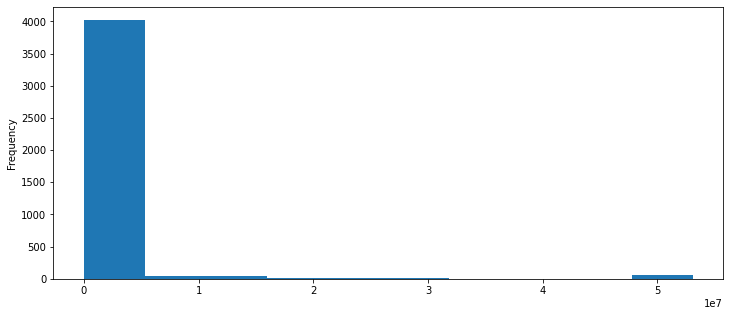

In [202]:
## Imputing missing values (numeric)

df['combinedTotalRevenue'].plot(kind='hist')

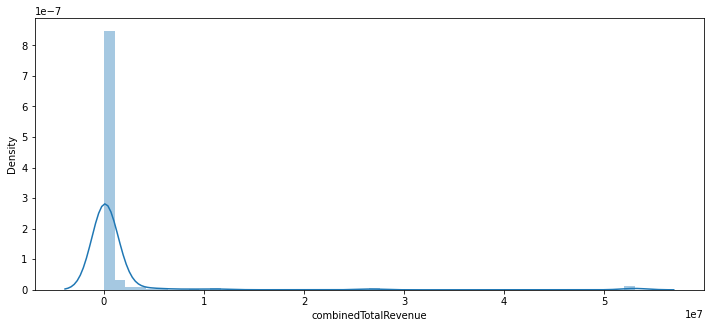

In [203]:


sns.distplot(df['combinedTotalRevenue'])

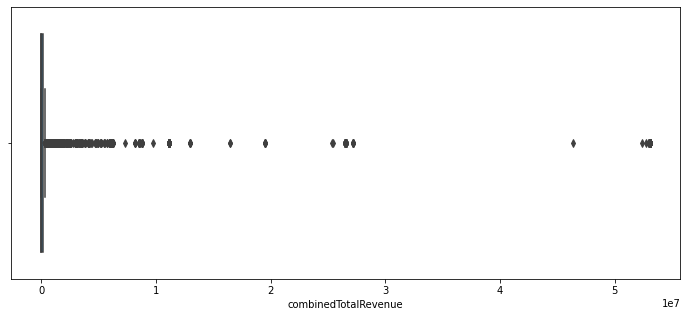

In [204]:

sns.boxplot(df['combinedTotalRevenue'])

In [205]:
Q1_rev = df['combinedTotalRevenue'].quantile(0.25)
Q3_rev = df['combinedTotalRevenue'].quantile(0.75)
IQR_rev = Q3_rev - Q1_rev

In [206]:
((df['combinedTotalRevenue'] < (Q1_rev - 1.5*IQR_rev)) | (df['combinedTotalRevenue'] > (Q3_rev + 1.5*IQR_rev))).sum()

662

Since the combinedTotalRevenue column contains a significant number of outliers, we would want to impute using the median and not the mean.

In [207]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')


In [208]:
df[['combinedTotalRevenue']] = imputer.fit_transform(df[['combinedTotalRevenue']])


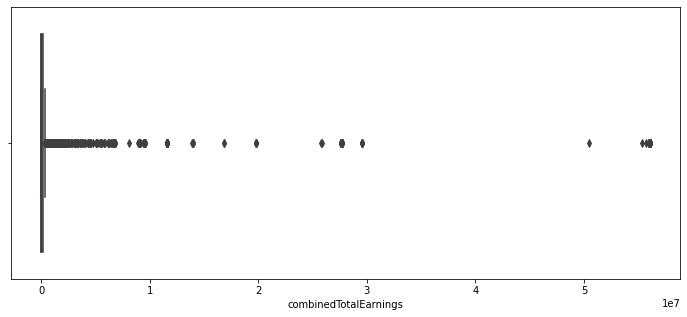

In [209]:
## combinedTotalEarnings
sns.boxplot(df['combinedTotalEarnings'])

In [210]:
Q1_ear = df['combinedTotalEarnings'].quantile(0.25)
Q3_ear = df['combinedTotalEarnings'].quantile(0.75)
IQR_ear = Q3_ear - Q1_ear

In [211]:
((df['combinedTotalEarnings'] < (Q1_ear - 1.5*IQR_ear)) | (df['combinedTotalEarnings'] > (Q3_ear + 1.5*IQR_ear))).sum()

661

We find the same case for combinedTotalEarnings, and so we will impute by median. 

In [212]:
df[['combinedTotalEarnings']] = imputer.fit_transform(df[['combinedTotalEarnings']])


In [213]:
df.isnull().sum()

recno                     0
portrait                  2
location                  0
hourlyRate                0
lastActivity              0
totalHoursBilled          0
totalPortfolioItems       0
skills                    0
nss100                    0
topRatedStatus            0
combinedTotalRevenue      0
totalHourlyJobs           0
totalFpJobs               0
hideEarnings              0
combinedTotalEarnings     0
topTalentGroup           13
descriptionSanitized      0
shortNameSanitized        0
titleSanitized            0
url                       0
uid                       0
searchRank                0
querySkill                0
querySkillUid             0
date_scrapped             0
searchRankRange           0
dtype: int64

In [214]:
## Imputing categorical data 

from sklearn_pandas import CategoricalImputer

c_imputer = CategoricalImputer()
df['topTalentGroup'] = c_imputer.fit_transform(df['topTalentGroup'])

In [215]:
df.isnull().sum()

recno                    0
portrait                 2
location                 0
hourlyRate               0
lastActivity             0
totalHoursBilled         0
totalPortfolioItems      0
skills                   0
nss100                   0
topRatedStatus           0
combinedTotalRevenue     0
totalHourlyJobs          0
totalFpJobs              0
hideEarnings             0
combinedTotalEarnings    0
topTalentGroup           0
descriptionSanitized     0
shortNameSanitized       0
titleSanitized           0
url                      0
uid                      0
searchRank               0
querySkill               0
querySkillUid            0
date_scrapped            0
searchRankRange          0
dtype: int64

## Cardinality of categorical variables 

In [216]:
## topRatedStatus

In [217]:
df['topRatedStatus'].value_counts()

top_rated           2334
not_eligible        1610
hipo                 218
hipo_inactive        100
tr_inactive           68
tr_agency_only        68
eligible              56
hipo_eligible         31
hipo_agency_only      15
Name: topRatedStatus, dtype: int64

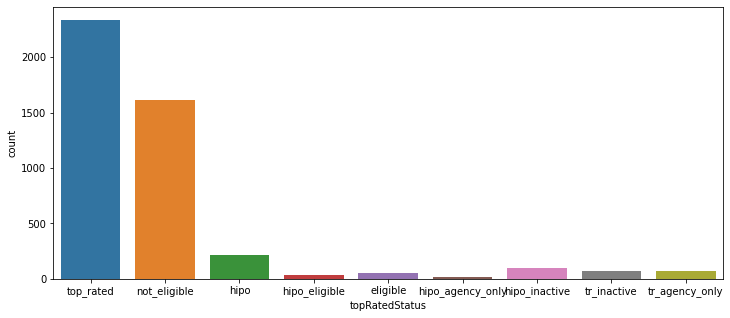

In [218]:
sns.countplot(df['topRatedStatus'])

In [219]:
## topTalentGroup

df['topTalentGroup'].value_counts()

not_eligible        3262
top_rated_plus      1197
tr_plus_eligible      23
tr_plus_inactive      18
Name: topTalentGroup, dtype: int64

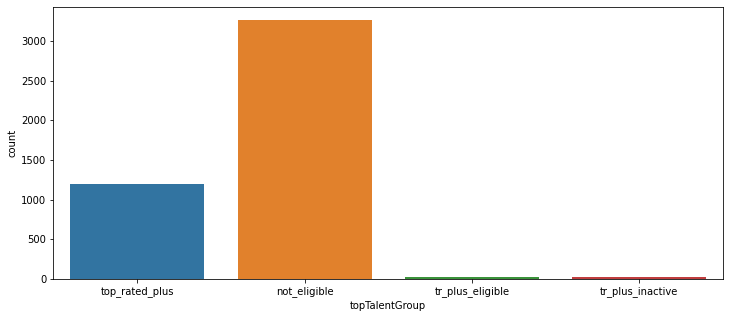

In [220]:
sns.countplot(df['topTalentGroup'])

In [221]:
df['querySkill'].value_counts()

API Development                500
OOPS                           500
Real Time Stream Processing    500
AngularJS                      500
iOS Development                500
HTML5                          500
Mobile UI Design               500
Symfony                        500
Android App Development        500
Name: querySkill, dtype: int64

In [222]:
df['querySkill'].value_counts()

API Development                500
OOPS                           500
Real Time Stream Processing    500
AngularJS                      500
iOS Development                500
HTML5                          500
Mobile UI Design               500
Symfony                        500
Android App Development        500
Name: querySkill, dtype: int64

In [223]:
## Reducing cardinality

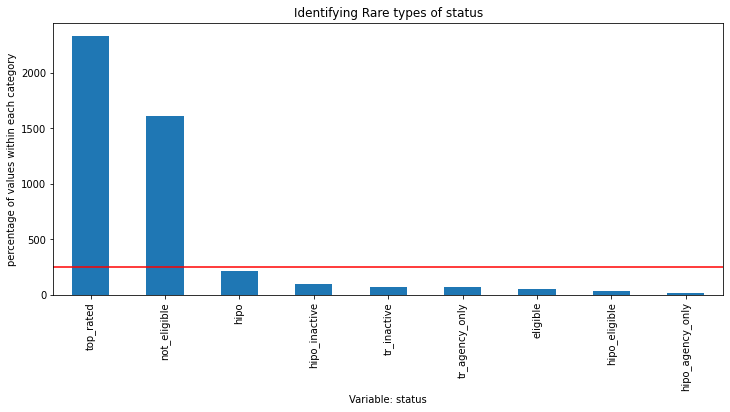

In [224]:
fig = df['topRatedStatus'].value_counts().sort_values(ascending=False).plot.bar()
fig.axhline(y=250, color='red')
fig.set_ylabel('percentage of values within each category')
fig.set_xlabel('Variable: status')
fig.set_title('Identifying Rare types of status')
plt.show()

We see that most values within the top_rated status are either top_rated or not_eligible. We can map all the other categories into one category called "Other". 

In [225]:
df['topRatedStatus'].value_counts()

top_rated           2334
not_eligible        1610
hipo                 218
hipo_inactive        100
tr_inactive           68
tr_agency_only        68
eligible              56
hipo_eligible         31
hipo_agency_only      15
Name: topRatedStatus, dtype: int64

In [226]:
label_map = {'top_rated': 'top_rated', 'not_eligible': 'not_eligible', 'hipo': 'Other', 'hipo_inactive': 'Other', 'tr_inactive': 'Other', 'tr_agency_only': 'Other', 'eligible': 'Other', 'hipo_eligible': 'Other', 'hipo_agency_only': 'Other'}

df['topRatedStatus'] = df['topRatedStatus'].apply(lambda x: label_map[x])

In [227]:
df['topRatedStatus'].value_counts()

top_rated       2334
not_eligible    1610
Other            556
Name: topRatedStatus, dtype: int64

Similarly for the talent groups: 

In [228]:
df['topTalentGroup'].value_counts()

not_eligible        3262
top_rated_plus      1197
tr_plus_eligible      23
tr_plus_inactive      18
Name: topTalentGroup, dtype: int64

In [229]:
talent_label_map = {'not_eligible': 'not_eligible', 'top_rated_plus': 'top_rated_plus', 'tr_plus_eligible': 'Other', 'tr_plus_inactive': 'Other'}
df['topTalentGroup'] = df['topTalentGroup'].apply(lambda x: talent_label_map[x])

In [230]:
df['topTalentGroup'].value_counts()

not_eligible      3262
top_rated_plus    1197
Other               41
Name: topTalentGroup, dtype: int64

In [231]:
X = df[['hourlyRate', 'totalHoursBilled', 'totalPortfolioItems', 'skills', 'topRatedStatus', 'combinedTotalRevenue', 'totalHourlyJobs', 'totalFpJobs', 'hideEarnings', 'combinedTotalEarnings', 'topTalentGroup', 'descriptionSanitized', 'titleSanitized', 'querySkill', 'searchRankRange' ]]


## Feature Engineering

With the features we currently have, we can either create new features or modify the existing features to create new attributes that might have an influence on the ranking. Let explore some of them : 

- skillPresent = check if querySkill is present in set of skills of the freelancer 
- HoursPerJob = totalHoursBilled/totalHourlyJobs


In [232]:
X['skillPresent'] = X.apply(lambda x: x.querySkill in x.skills, axis=1)
X['skillPresent'] = X['skillPresent'].astype(int)
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,skills,topRatedStatus,combinedTotalRevenue,totalHourlyJobs,totalFpJobs,hideEarnings,combinedTotalEarnings,topTalentGroup,descriptionSanitized,titleSanitized,querySkill,searchRankRange,skillPresent
0,110.0,9495.500000,35,"[PHP, API Development, Laravel, AJAX, jQuery, ...",top_rated,254100.57,70,80,0,275612.50,top_rated_plus,"Hi, I am Balbinder,\nI have been doing app dev...",Full Stack Developer,API Development,401-500,1
1,14.0,1396.166667,5,"[ASP.NET MVC, Angular, jQuery, AJAX, ASP.NET, ...",top_rated,53061481.28,7,1,0,56062604.80,top_rated_plus,Have 5+ years of web development using NET Fra...,Web developer : ASP.NET,OOPS,101-200,0
2,39.0,1200.761034,2,"[iOS Development, Objective-C, Apple Xcode, SQ...",top_rated,26506670.76,6,0,0,27630978.69,top_rated_plus,Over the recent 5 years I&#039;ve developed na...,Ecommerce Development / iOS / Cross-platform d...,API Development,401-500,0
3,40.0,35.333333,3,"[SEO Writing, Blog Writing, Article Writing, C...",top_rated,6224.34,3,24,0,7308.17,not_eligible,The big push in SEO best practices is to estab...,SEO Web Content Specialist,Real Time Stream Processing,301-400,0
4,20.0,118.500000,7,"[API, Database Architecture, Website Developme...",top_rated,7995.80,8,38,0,9541.00,not_eligible,"Hello My name is Hussain Murtaza, I am a Senio...",".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...",API Development,0-100,1


In [233]:
## Hours per job

X['hoursPerJob'] = X['totalHoursBilled']/X['totalHourlyJobs']


In [234]:
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,skills,topRatedStatus,combinedTotalRevenue,totalHourlyJobs,totalFpJobs,hideEarnings,combinedTotalEarnings,topTalentGroup,descriptionSanitized,titleSanitized,querySkill,searchRankRange,skillPresent,hoursPerJob
0,110.0,9495.500000,35,"[PHP, API Development, Laravel, AJAX, jQuery, ...",top_rated,254100.57,70,80,0,275612.50,top_rated_plus,"Hi, I am Balbinder,\nI have been doing app dev...",Full Stack Developer,API Development,401-500,1,135.650000
1,14.0,1396.166667,5,"[ASP.NET MVC, Angular, jQuery, AJAX, ASP.NET, ...",top_rated,53061481.28,7,1,0,56062604.80,top_rated_plus,Have 5+ years of web development using NET Fra...,Web developer : ASP.NET,OOPS,101-200,0,199.452381
2,39.0,1200.761034,2,"[iOS Development, Objective-C, Apple Xcode, SQ...",top_rated,26506670.76,6,0,0,27630978.69,top_rated_plus,Over the recent 5 years I&#039;ve developed na...,Ecommerce Development / iOS / Cross-platform d...,API Development,401-500,0,200.126839
3,40.0,35.333333,3,"[SEO Writing, Blog Writing, Article Writing, C...",top_rated,6224.34,3,24,0,7308.17,not_eligible,The big push in SEO best practices is to estab...,SEO Web Content Specialist,Real Time Stream Processing,301-400,0,11.777778
4,20.0,118.500000,7,"[API, Database Architecture, Website Developme...",top_rated,7995.80,8,38,0,9541.00,not_eligible,"Hello My name is Hussain Murtaza, I am a Senio...",".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...",API Development,0-100,1,14.812500


## Identifying linear relationships

In [235]:
print(df.columns)

Index(['recno', 'portrait', 'location', 'hourlyRate', 'lastActivity',
       'totalHoursBilled', 'totalPortfolioItems', 'skills', 'nss100',
       'topRatedStatus', 'combinedTotalRevenue', 'totalHourlyJobs',
       'totalFpJobs', 'hideEarnings', 'combinedTotalEarnings',
       'topTalentGroup', 'descriptionSanitized', 'shortNameSanitized',
       'titleSanitized', 'url', 'uid', 'searchRank', 'querySkill',
       'querySkillUid', 'date_scrapped', 'searchRankRange'],
      dtype='object')


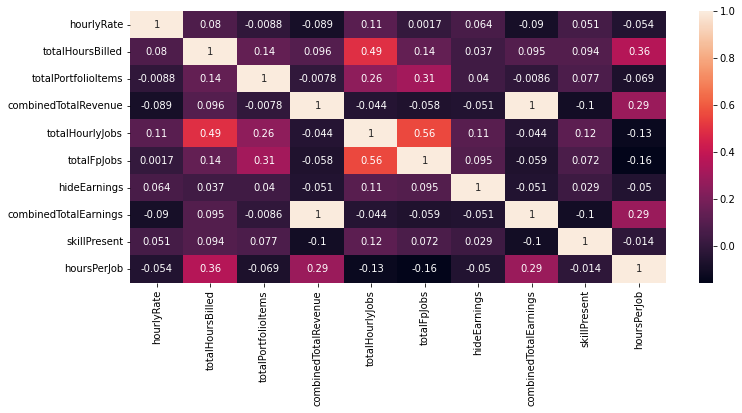

In [236]:
sns.heatmap(X.corr(), annot=True)

There are several interesting insights from this: 

- There is significant correlation between totalHourlyJobs and totalHoursBilled - which makes sense because the more jobs you do, the more hours you put in. (0.49)

- There is also a significant correlation between totalFpJobs and totalHourlyJobs. (0.56)

- Finally, there is a huge correlation between combinedTotalRevenue and combinedTotalEarnings. The reason for this is simply because combinedTotalEarnings = combinedTotalRevenue + incentives 

Based on the above insigths, we can drop a few correlated features that would hinder the precision of the estimated coefficients. 

In [237]:
X.drop(columns=['totalHourlyJobs', 'totalFpJobs', 'combinedTotalRevenue'], inplace=True)

In [238]:
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,skills,topRatedStatus,hideEarnings,combinedTotalEarnings,topTalentGroup,descriptionSanitized,titleSanitized,querySkill,searchRankRange,skillPresent,hoursPerJob
0,110.0,9495.500000,35,"[PHP, API Development, Laravel, AJAX, jQuery, ...",top_rated,0,275612.50,top_rated_plus,"Hi, I am Balbinder,\nI have been doing app dev...",Full Stack Developer,API Development,401-500,1,135.650000
1,14.0,1396.166667,5,"[ASP.NET MVC, Angular, jQuery, AJAX, ASP.NET, ...",top_rated,0,56062604.80,top_rated_plus,Have 5+ years of web development using NET Fra...,Web developer : ASP.NET,OOPS,101-200,0,199.452381
2,39.0,1200.761034,2,"[iOS Development, Objective-C, Apple Xcode, SQ...",top_rated,0,27630978.69,top_rated_plus,Over the recent 5 years I&#039;ve developed na...,Ecommerce Development / iOS / Cross-platform d...,API Development,401-500,0,200.126839
3,40.0,35.333333,3,"[SEO Writing, Blog Writing, Article Writing, C...",top_rated,0,7308.17,not_eligible,The big push in SEO best practices is to estab...,SEO Web Content Specialist,Real Time Stream Processing,301-400,0,11.777778
4,20.0,118.500000,7,"[API, Database Architecture, Website Developme...",top_rated,0,9541.00,not_eligible,"Hello My name is Hussain Murtaza, I am a Senio...",".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...",API Development,0-100,1,14.812500


## Encoding categorical variables 

In [239]:
encoded_X = pd.get_dummies(X[['topRatedStatus', 'topTalentGroup', 'hideEarnings']])

In [240]:
X = pd.concat([X, encoded_X], axis=1)
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,skills,topRatedStatus,hideEarnings,combinedTotalEarnings,topTalentGroup,descriptionSanitized,titleSanitized,...,searchRankRange,skillPresent,hoursPerJob,hideEarnings,topRatedStatus_Other,topRatedStatus_not_eligible,topRatedStatus_top_rated,topTalentGroup_Other,topTalentGroup_not_eligible,topTalentGroup_top_rated_plus
0,110.0,9495.500000,35,"[PHP, API Development, Laravel, AJAX, jQuery, ...",top_rated,0,275612.50,top_rated_plus,"Hi, I am Balbinder,\nI have been doing app dev...",Full Stack Developer,...,401-500,1,135.650000,0,0,0,1,0,0,1
1,14.0,1396.166667,5,"[ASP.NET MVC, Angular, jQuery, AJAX, ASP.NET, ...",top_rated,0,56062604.80,top_rated_plus,Have 5+ years of web development using NET Fra...,Web developer : ASP.NET,...,101-200,0,199.452381,0,0,0,1,0,0,1
2,39.0,1200.761034,2,"[iOS Development, Objective-C, Apple Xcode, SQ...",top_rated,0,27630978.69,top_rated_plus,Over the recent 5 years I&#039;ve developed na...,Ecommerce Development / iOS / Cross-platform d...,...,401-500,0,200.126839,0,0,0,1,0,0,1
3,40.0,35.333333,3,"[SEO Writing, Blog Writing, Article Writing, C...",top_rated,0,7308.17,not_eligible,The big push in SEO best practices is to estab...,SEO Web Content Specialist,...,301-400,0,11.777778,0,0,0,1,0,1,0
4,20.0,118.500000,7,"[API, Database Architecture, Website Developme...",top_rated,0,9541.00,not_eligible,"Hello My name is Hussain Murtaza, I am a Senio...",".NET,VBA,Python,Azure/AWS, SQL, Typescript, An...",...,0-100,1,14.812500,0,0,0,1,0,1,0


In [241]:
X.drop(['topRatedStatus', 'hideEarnings', 'topTalentGroup'], axis=1, inplace=True)

In [242]:
X.drop(['titleSanitized', 'descriptionSanitized', 'skills'], axis=1, inplace=True)

In [243]:
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,combinedTotalEarnings,querySkill,searchRankRange,skillPresent,hoursPerJob,topRatedStatus_Other,topRatedStatus_not_eligible,topRatedStatus_top_rated,topTalentGroup_Other,topTalentGroup_not_eligible,topTalentGroup_top_rated_plus
0,110.0,9495.500000,35,275612.50,API Development,401-500,1,135.650000,0,0,1,0,0,1
1,14.0,1396.166667,5,56062604.80,OOPS,101-200,0,199.452381,0,0,1,0,0,1
2,39.0,1200.761034,2,27630978.69,API Development,401-500,0,200.126839,0,0,1,0,0,1
3,40.0,35.333333,3,7308.17,Real Time Stream Processing,301-400,0,11.777778,0,0,1,0,1,0
4,20.0,118.500000,7,9541.00,API Development,0-100,1,14.812500,0,0,1,0,1,0


- Transfroming variables with the logarithm : 
The logarithm function is commonly used to transform variables. It has a strong effect on the shape of the variable distribution and can be applied to positive variables. 

- To evaluate the effect of the transformation on the variable distribution, we will create a funciton that takes a dataframe and a variable name and plots a histogram next to a QQ plot. 

In [244]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  df[variable].hist(bins=30)
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.show()


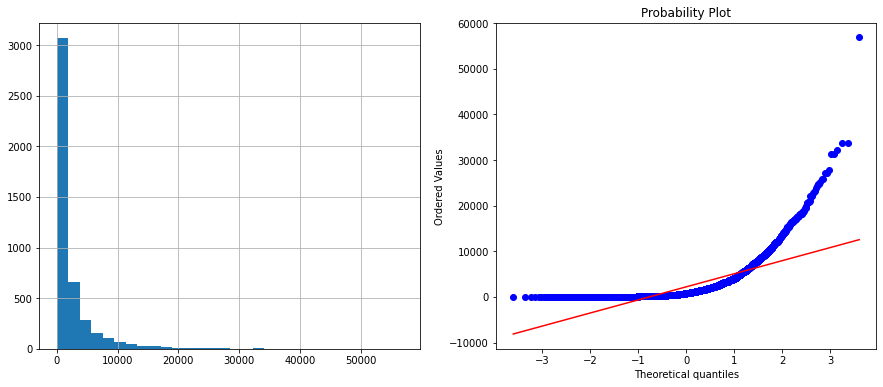

In [245]:
diagnostic_plots(X, 'totalHoursBilled')

As we can see, the distribution in the data is clearly skewed and doesn not seem to follow a normal distribution. Let us check if we can transform the data to make it more normal. Before that, let us look at some more examples before the transformation. 

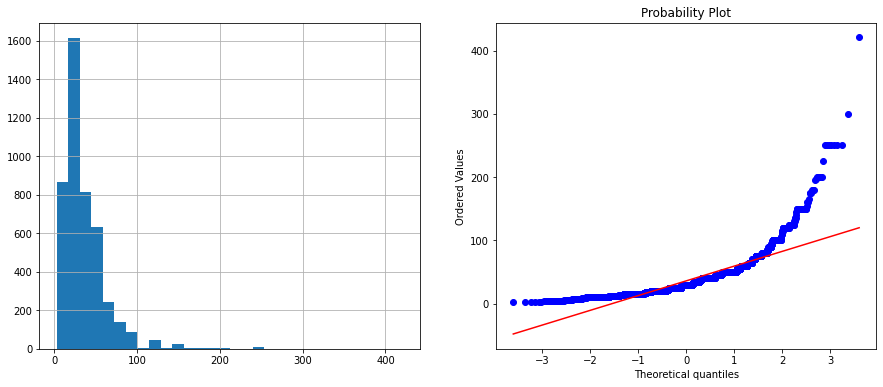

In [246]:
diagnostic_plots(X, 'hourlyRate')

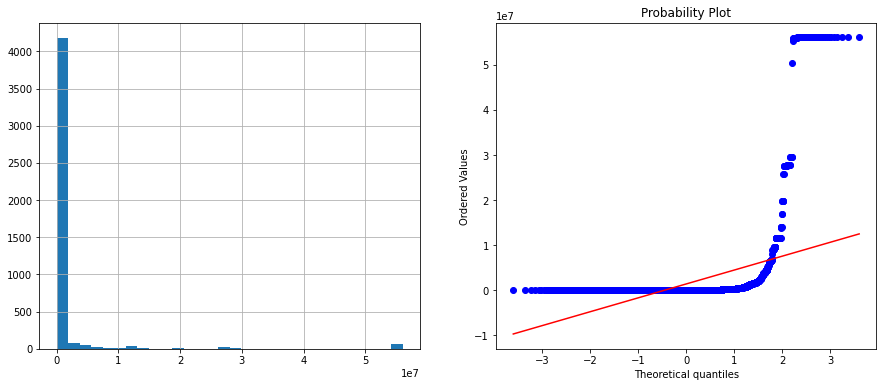

In [247]:
diagnostic_plots(X, 'combinedTotalEarnings')

In [248]:
to_log = ['hourlyRate', 'totalHoursBilled','combinedTotalEarnings' ]
X_log = X[to_log].applymap(lambda x: np.log(x+1))
X_log.columns = 'log_'+ X_log.columns
X_log.head()

,log_hourlyRate,log_totalHoursBilled,log_combinedTotalEarnings
0,4.709530,9.158679,12.526755
1,2.708050,7.242202,17.841980
2,3.688879,7.091543,17.134448
3,3.713572,3.592736,8.896885
4,3.044522,4.783316,9.163458


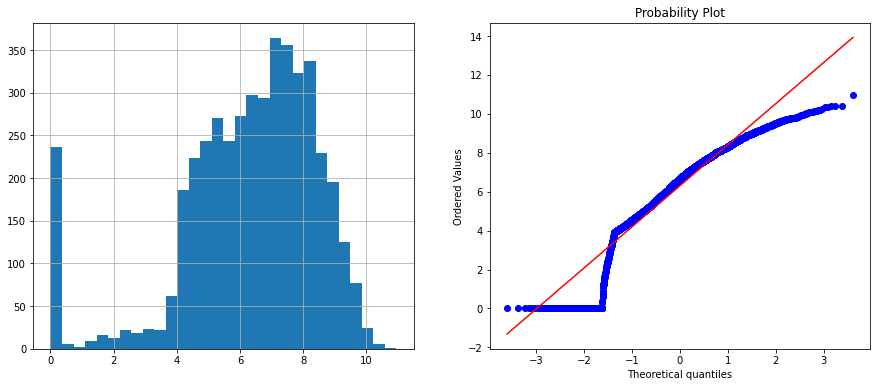

In [249]:
diagnostic_plots(X_log, 'log_totalHoursBilled')

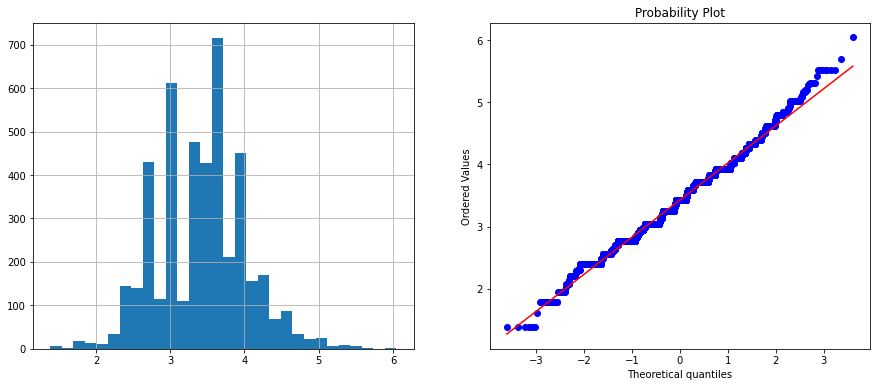

In [250]:
diagnostic_plots(X_log, 'log_hourlyRate')

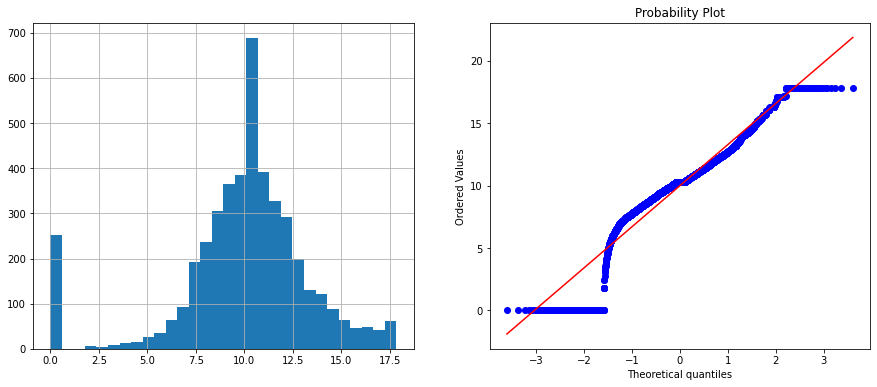

In [251]:
diagnostic_plots(X_log, 'log_combinedTotalEarnings')

In [252]:
X = pd.concat([X, X_log], axis=1)

In [253]:
X[['hoursPerJob']] = imputer.fit_transform(X[['hoursPerJob']])


In [254]:
X.head()

,hourlyRate,totalHoursBilled,totalPortfolioItems,combinedTotalEarnings,querySkill,searchRankRange,skillPresent,hoursPerJob,topRatedStatus_Other,topRatedStatus_not_eligible,topRatedStatus_top_rated,topTalentGroup_Other,topTalentGroup_not_eligible,topTalentGroup_top_rated_plus,log_hourlyRate,log_totalHoursBilled,log_combinedTotalEarnings
0,110.0,9495.500000,35,275612.50,API Development,401-500,1,135.650000,0,0,1,0,0,1,4.709530,9.158679,12.526755
1,14.0,1396.166667,5,56062604.80,OOPS,101-200,0,199.452381,0,0,1,0,0,1,2.708050,7.242202,17.841980
2,39.0,1200.761034,2,27630978.69,API Development,401-500,0,200.126839,0,0,1,0,0,1,3.688879,7.091543,17.134448
3,40.0,35.333333,3,7308.17,Real Time Stream Processing,301-400,0,11.777778,0,0,1,0,1,0,3.713572,3.592736,8.896885
4,20.0,118.500000,7,9541.00,API Development,0-100,1,14.812500,0,0,1,0,1,0,3.044522,4.783316,9.163458


In [255]:
X.drop(['hourlyRate', 'totalHoursBilled', 'combinedTotalEarnings'], axis=1, inplace=True)

In [256]:
X.head()

,totalPortfolioItems,querySkill,searchRankRange,skillPresent,hoursPerJob,topRatedStatus_Other,topRatedStatus_not_eligible,topRatedStatus_top_rated,topTalentGroup_Other,topTalentGroup_not_eligible,topTalentGroup_top_rated_plus,log_hourlyRate,log_totalHoursBilled,log_combinedTotalEarnings
0,35,API Development,401-500,1,135.650000,0,0,1,0,0,1,4.709530,9.158679,12.526755
1,5,OOPS,101-200,0,199.452381,0,0,1,0,0,1,2.708050,7.242202,17.841980
2,2,API Development,401-500,0,200.126839,0,0,1,0,0,1,3.688879,7.091543,17.134448
3,3,Real Time Stream Processing,301-400,0,11.777778,0,0,1,0,1,0,3.713572,3.592736,8.896885
4,7,API Development,0-100,1,14.812500,0,0,1,0,1,0,3.044522,4.783316,9.163458


## Modeling

In [257]:
X[['searchRankRange']].values

array([['401-500'],
       ['101-200'],
       ['401-500'],
       ...,
       ['0-100'],
       ['101-200'],
       ['101-200']], dtype=object)

In [258]:
X_groups = X.groupby('querySkill')
X_groups_list = [X_groups.get_group(x) for x in X_groups.groups]

In [259]:
X.head()

,totalPortfolioItems,querySkill,searchRankRange,skillPresent,hoursPerJob,topRatedStatus_Other,topRatedStatus_not_eligible,topRatedStatus_top_rated,topTalentGroup_Other,topTalentGroup_not_eligible,topTalentGroup_top_rated_plus,log_hourlyRate,log_totalHoursBilled,log_combinedTotalEarnings
0,35,API Development,401-500,1,135.650000,0,0,1,0,0,1,4.709530,9.158679,12.526755
1,5,OOPS,101-200,0,199.452381,0,0,1,0,0,1,2.708050,7.242202,17.841980
2,2,API Development,401-500,0,200.126839,0,0,1,0,0,1,3.688879,7.091543,17.134448
3,3,Real Time Stream Processing,301-400,0,11.777778,0,0,1,0,1,0,3.713572,3.592736,8.896885
4,7,API Development,0-100,1,14.812500,0,0,1,0,1,0,3.044522,4.783316,9.163458


In [260]:
def logistic_regression_model(data):
  X = data[['totalPortfolioItems', 'skillPresent', 'hoursPerJob', 'topRatedStatus_Other', 'topRatedStatus_not_eligible', 'topRatedStatus_top_rated', 'topTalentGroup_Other', 'topTalentGroup_not_eligible', 'topTalentGroup_top_rated_plus', 'log_hourlyRate', 'log_totalHoursBilled', 'log_combinedTotalEarnings']]
  y = data[['searchRankRange']].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  return lr.score(X_test, y_test)

In [261]:
def group_predictions_lr(data):
  return data.groupby('querySkill').apply(logistic_regression_model)

In [262]:
print(group_predictions_lr(X))

querySkill
API Development                0.15
Android App Development        0.21
AngularJS                      0.28
HTML5                          0.35
Mobile UI Design               0.24
OOPS                           0.40
Real Time Stream Processing    0.20
Symfony                        0.18
iOS Development                0.20
dtype: float64


In [263]:
def knn_model(data):
  X = data[['totalPortfolioItems', 'skillPresent', 'hoursPerJob', 'topRatedStatus_Other', 'topRatedStatus_not_eligible', 'topRatedStatus_top_rated', 'topTalentGroup_Other', 'topTalentGroup_not_eligible', 'topTalentGroup_top_rated_plus', 'log_hourlyRate', 'log_totalHoursBilled', 'log_combinedTotalEarnings']]
  y = data[['searchRankRange']].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  return knn.score(X_test, y_test)

In [264]:
def group_predictions_knn(data):
  return data.groupby('querySkill').apply(knn_model)

In [265]:
print(group_predictions_knn(X))

querySkill
API Development                0.22
Android App Development        0.22
AngularJS                      0.27
HTML5                          0.25
Mobile UI Design               0.35
OOPS                           0.38
Real Time Stream Processing    0.20
Symfony                        0.13
iOS Development                0.26
dtype: float64


In [266]:
def dt_model(data):
  X = data[['totalPortfolioItems', 'skillPresent', 'hoursPerJob', 'topRatedStatus_Other', 'topRatedStatus_not_eligible', 'topRatedStatus_top_rated', 'topTalentGroup_Other', 'topTalentGroup_not_eligible', 'topTalentGroup_top_rated_plus', 'log_hourlyRate', 'log_totalHoursBilled', 'log_combinedTotalEarnings']]
  y = data[['searchRankRange']].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)
  return dt.score(X_test, y_test)

In [267]:
def group_predictions_dt(data):
  return data.groupby('querySkill').apply(dt_model)

In [268]:
print(group_predictions_dt(X))

querySkill
API Development                0.23
Android App Development        0.33
AngularJS                      0.26
HTML5                          0.37
Mobile UI Design               0.40
OOPS                           0.44
Real Time Stream Processing    0.42
Symfony                        0.28
iOS Development                0.41
dtype: float64


In [308]:
def rf_model(data):
  X = data[['totalPortfolioItems', 'skillPresent', 'hoursPerJob', 'topRatedStatus_Other', 'topRatedStatus_not_eligible', 'topRatedStatus_top_rated', 'topTalentGroup_Other', 'topTalentGroup_not_eligible', 'topTalentGroup_top_rated_plus', 'log_hourlyRate', 'log_totalHoursBilled', 'log_combinedTotalEarnings']]
  y = data[['searchRankRange']].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  return rf.score(X_test, y_test)

In [309]:
def group_predictions_rf(data):
  return data.groupby('querySkill').apply(rf_model)

In [310]:
print(group_predictions_rf(X))

querySkill
API Development                0.32
Android App Development        0.30
AngularJS                      0.26
HTML5                          0.41
Mobile UI Design               0.38
OOPS                           0.61
Real Time Stream Processing    0.35
Symfony                        0.44
iOS Development                0.41
dtype: float64
